# Prostate Cancer Project
# Metastasis Prediction Using mRNA Expression Data 
# Feature Selection 1st Step

## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.feature_selection import VarianceThreshold

## Import Function

In [2]:
def read_object(obj_path):
    with open(obj_path, 'rb') as input:
        return pickle.load(input)

def save_object(obj, dir_path, file_name, file_extension='pkl', create_dir=True):
    if create_dir:
        if not os.path.isdir(dir_path):
            os.makedirs(dir_path)
    name = os.path.normpath(os.path.join(dir_path, file_name+'.'+file_extension))
    with open(name, 'wb') as output:  # overwrites any existing file
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
        return name

## Loading Train and Test Data Matrix and Target Vector

In [ ]:
dir_path = 'D:/VSCodes (Saeed)/Prostate Cancer Project (Metastasis Status)(mRNA)/Preprocessing_Step/'

file_name = 'Train Matrix.pkl'
train_matrix =read_object(dir_path+file_name)

file_name = 'Test Matrix.pkl'
test_matrix =read_object(dir_path+file_name)

file_name = 'Train Target.pkl'
train_target =read_object(dir_path+file_name)

file_name = 'Test Target.pkl'
test_target =read_object(dir_path+file_name)

dir_path = 'D:/VSCodes (Saeed)/Prostate Cancer Project (Metastasis Status)(mRNA)/Reading_Step/'

file_name = 'mRNA ID.pkl'
mRNA_id = read_object(dir_path + file_name)

## Normalization 
## Min-Max or Z-Score

In [4]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler.fit(train_matrix)
normal_train_matrix = scaler.transform(train_matrix)
normal_test_matrix = scaler.transform(test_matrix)

## Feature Selection
## Filter Methods 
## Variance Threshold

In [5]:
selector = VarianceThreshold(threshold=0.05)
selector.fit(normal_train_matrix)
selected_index = selector.get_support(indices=True)
selected_train_matrix = selector.transform(normal_train_matrix)
selected_test_matrix = selector.transform(normal_test_matrix)
print(selected_train_matrix.shape)
print(selected_test_matrix.shape)

(436, 3935)
(109, 3935)


In [6]:
selector.variances_

array([0.02675119, 0.01758695, 0.01489385, ..., 0.00908997, 0.01569346,
       0.04206911], shape=(1411399,))

In [7]:
selected_index

array([     51,    1488,    3118, ..., 1410528, 1410816, 1411219],
      shape=(3935,))

In [8]:
selected_mRNA_id = mRNA_id[selected_index]
selected_mRNA_id.shape

(3935,)

## PCA and Visualization

In [9]:
pca = PCA(n_components=2)
pca.fit(selected_train_matrix)
train_pca_matrix = pca.transform(selected_train_matrix)
test_pca_matrix = pca.transform(selected_test_matrix)
print(train_pca_matrix.shape)
print(test_pca_matrix.shape)

(436, 2)
(109, 2)


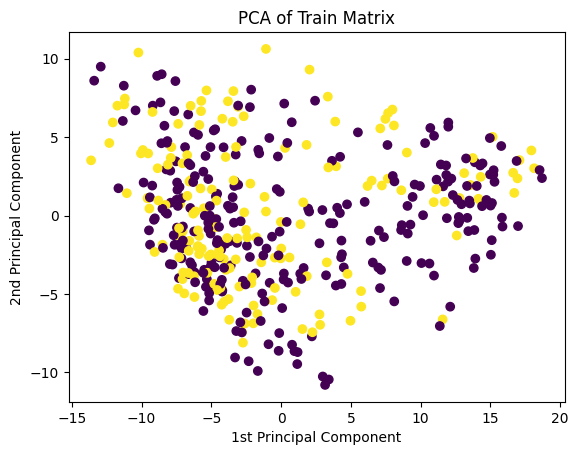

In [10]:
plt.Figure(figsize=(10,10))
fig = plt.scatter(train_pca_matrix[:,0], train_pca_matrix[:,1], c=train_target)
plt.title('PCA of Train Matrix')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.show()

## Classifying based on the PCA Data Matrix

In [11]:
n_components = 300
pca = PCA(n_components=n_components)
pca.fit(selected_train_matrix)
train_pca_matrix = pca.transform(selected_train_matrix)
test_pca_matrix = pca.transform(selected_test_matrix)
print(train_pca_matrix.shape)
print(test_pca_matrix.shape)

(436, 300)
(109, 300)


--------------------------------------------------
Training set
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       270
         1.0       0.98      0.95      0.96       166

    accuracy                           0.97       436
   macro avg       0.97      0.97      0.97       436
weighted avg       0.97      0.97      0.97       436



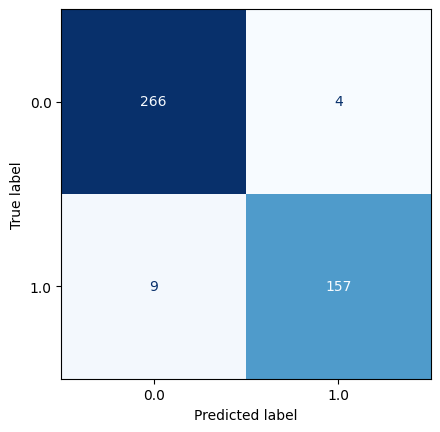

--------------------------------------------------
Test set
              precision    recall  f1-score   support

         0.0       0.71      0.84      0.77        63
         1.0       0.71      0.52      0.60        46

    accuracy                           0.71       109
   macro avg       0.71      0.68      0.68       109
weighted avg       0.71      0.71      0.70       109



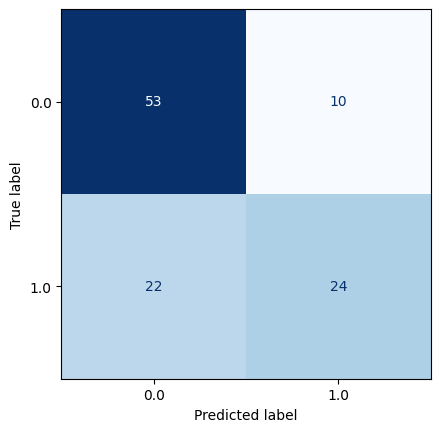

In [12]:
model = LinearDiscriminantAnalysis()
# model = QuadraticDiscriminantAnalysis()
# model = GaussianNB()
model.fit(train_pca_matrix, train_target)
train_pred = model.predict(train_pca_matrix)
test_pred = model.predict(test_pca_matrix)
print('-'*50)
print('Training set')
print(classification_report(train_target, train_pred))

ConfusionMatrixDisplay.from_predictions(train_target, train_pred, cmap='Blues', colorbar=False)
plt.show()

print('-'*50)
print('Test set')
print(classification_report(test_target, test_pred))
ConfusionMatrixDisplay.from_predictions(test_target, test_pred, cmap='Blues', colorbar=False)
plt.show()

## Saving Result

In [ ]:
dir_path = 'D:/VSCodes (Saeed)/Prostate Cancer Project (Metastasis Status)(mRNA)/Feature_Selection_Step/'
file_name = 'Selected Features (1st step)'
save_object(selected_mRNA_id, dir_path, file_name)

'D:\\VSCodes_Saeed\\Prostate Cancer Project (Metastasis Status)(mRNA)\\Feature_Selection_Step\\Selected Features (1st step).pkl'